In [3]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [46]:
train_data = torchvision.datasets.MNIST(root='images', transform=ToTensor())

In [47]:
images_of_eights = train_data.data[train_data.targets == 8]
images_of_eights = images_of_eights.float()

images_of_eights /= 255
images_of_eights = images_of_eights * 2 - 1

In [48]:
T = 1000
beta = torch.linspace(1.0e-4, 2.0e-2, T)
alpha = 1. - beta
alpha_bar = torch.cumprod(alpha, axis=0)
means = torch.sqrt(alpha_bar)
variances = 1 - alpha_bar

In [49]:
def forward_step(image: torch.Tensor, t: int) -> torch.Tensor:
    noise = torch.randn_like(image)
    
    scaled_up_noise = means[t] + noise * variances[t]
    
    return image + scaled_up_noise, scaled_up_noise

In [52]:
img, noise = forward_step(images_of_eights[21] , 999)

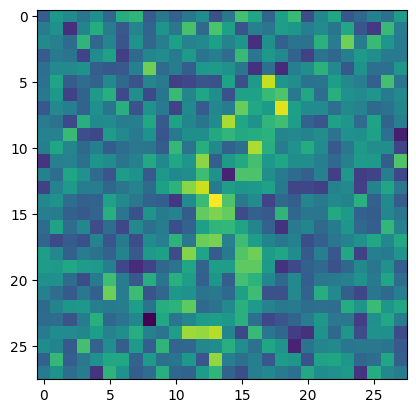

In [53]:
plt.imshow(img)

plt.show()